In [6]:
import tweepy
import csv
# import credentials as creds

#Twitter API credentials
consumer_key = 
consumer_secret  = 
access_key  = 
access_secret = 

#authorize twitter, initialize tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

def get_all_tweets(screen_name):
	#Twitter only allows access to a users most recent 3240 tweets with this method
	alltweets = []
	#make initial request for most recent tweets (200 is the maximum allowed count)
	new_tweets = api.user_timeline(screen_name = screen_name,count=200)
	alltweets.extend(new_tweets)
	oldest = alltweets[-1].id - 1
	while len(new_tweets) > 0:
		print("getting tweets before %s" % (oldest))
		new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
		alltweets.extend(new_tweets)
		oldest = alltweets[-1].id - 1

		print("...%s tweets downloaded so far" % (len(alltweets)))

	outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]

	with open('%s_tweets.csv' % screen_name, 'w', newline='') as f:
		writer = csv.writer(f)
		writer.writerow(["id","created_at","text"])
		writer.writerows(outtweets)

	pass

username = "trimet"
#print ("["+ctime()+"] Downloading new tweets from @"+username)
print ("Downloading new tweets from @"+username)
get_all_tweets(username)

getting tweets before 965076068439764991
...400 tweets downloaded so far
getting tweets before 941975276820426751
...600 tweets downloaded so far
getting tweets before 922950153928978431
...800 tweets downloaded so far
getting tweets before 905865569936613375
...1000 tweets downloaded so far
getting tweets before 895773347434319871
...1200 tweets downloaded so far
getting tweets before 892444312415256575
...1400 tweets downloaded so far
getting tweets before 879391944413138943
...1600 tweets downloaded so far
getting tweets before 865331732735696895
...1800 tweets downloaded so far
getting tweets before 856258780987785216
...2000 tweets downloaded so far
getting tweets before 848996576148111359
...2200 tweets downloaded so far
getting tweets before 837336917821665279
...2400 tweets downloaded so far
getting tweets before 828755139250921471
...2600 tweets downloaded so far
getting tweets before 824717353489358847
...2800 tweets downloaded so far
getting tweets before 821514167588831231


In [8]:
# Parse the tweets and filter
import tweepy #https://github.com/tweepy/tweepy
import csv
import string
import markovify
import shelve
import random
import time
import re
import pandas
#import HTMLParser
from datetime import datetime

# dedup parsed ids
#df = pandas.read_csv('parsed_ids.csv')
#df.drop_duplicates(subset=None,inplace=True)
#df.to_csv('parsed_ids.csv')


with open('parsed_ids.csv','r') as f:
    old_ids = [row[0] for row in csv.reader(f)]

# Parse the tweets and filter
with open('trimet_tweets.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['id'] not in old_ids:
            text = row['text']
            words = [text]
            #filter based on line types and if tweet has "delay"
            ## RED LINE
            if re.search(r'\b' + "Red" + r'\b', str(words))and (
                    re.search(r'\b' + "delay" + r'\b', str(words))
                    or re.search(r'\b' + "Delay" + r'\b', str(words))
                    or re.search(r'\b' + "delays" + r'\b', str(words))
                    or re.search(r'\b' + "Delays" + r'\b', str(words))
                    or re.search(r'\b' + "delayed" + r'\b', str(words))
                    or re.search(r'\b' + "Delayed" + r'\b', str(words))
                ):
                #print(row['id'],row['created_at'],"Red")
                with open('delays.csv','a',newline='') as delays:
                    writer = csv.writer(delays)
                    writer.writerow([row['id'],row['created_at'],"Red"])
            with open('parsed_ids.csv','a',newline='') as parsed:
                writer = csv.writer(parsed)
                writer.writerow([row['id']])
            
            ## BLUE LINE
            if re.search(r'\b' + "Blue" + r'\b', str(words))and (
                    re.search(r'\b' + "delay" + r'\b', str(words))
                    or re.search(r'\b' + "Delay" + r'\b', str(words))
                    or re.search(r'\b' + "delays" + r'\b', str(words))
                    or re.search(r'\b' + "Delays" + r'\b', str(words))
                    or re.search(r'\b' + "delayed" + r'\b', str(words))
                    or re.search(r'\b' + "Delayed" + r'\b', str(words))
                ):
                #print(row['id'],row['created_at'],"Blue")
                with open('delays.csv','a',newline='') as delays:
                    writer = csv.writer(delays)
                    writer.writerow([row['id'],row['created_at'],"Blue"])
            with open('parsed_ids.csv','a',newline='') as parsed:
                writer = csv.writer(parsed)
                writer.writerow([row['id']])      
            
            ## GREEN LINE
            if re.search(r'\b' + "Green" + r'\b', str(words))and (
                    re.search(r'\b' + "delay" + r'\b', str(words))
                    or re.search(r'\b' + "Delay" + r'\b', str(words))
                    or re.search(r'\b' + "delays" + r'\b', str(words))
                    or re.search(r'\b' + "Delays" + r'\b', str(words))
                    or re.search(r'\b' + "delayed" + r'\b', str(words))
                    or re.search(r'\b' + "Delayed" + r'\b', str(words))
                ):
                #print(row['id'],row['created_at'],"Green")
                with open('delays.csv','a',newline='') as delays:
                    writer = csv.writer(delays)
                    writer.writerow([row['id'],row['created_at'],"Green"])
            with open('parsed_ids.csv','a',newline='') as parsed:
                writer = csv.writer(parsed)
                writer.writerow([row['id']])       
            
            ## YELLOW LINE
            if re.search(r'\b' + "Yellow" + r'\b', str(words))and (
                    re.search(r'\b' + "delay" + r'\b', str(words))
                    or re.search(r'\b' + "Delay" + r'\b', str(words))
                    or re.search(r'\b' + "delays" + r'\b', str(words))
                    or re.search(r'\b' + "Delays" + r'\b', str(words))
                    or re.search(r'\b' + "delayed" + r'\b', str(words))
                    or re.search(r'\b' + "Delayed" + r'\b', str(words))
                ):
                #print(row['id'],row['created_at'],"Yellow")
                with open('delays.csv','a',newline='') as delays:
                    writer = csv.writer(delays)
                    writer.writerow([row['id'],row['created_at'],"Yellow"])
            with open('parsed_ids.csv','a',newline='') as parsed:
                writer = csv.writer(parsed)
                writer.writerow([row['id']])       
            
            ## ORANGE LINE
            if re.search(r'\b' + "Orange" + r'\b', str(words))and (
                    re.search(r'\b' + "delay" + r'\b', str(words))
                    or re.search(r'\b' + "Delay" + r'\b', str(words))
                    or re.search(r'\b' + "delays" + r'\b', str(words))
                    or re.search(r'\b' + "Delays" + r'\b', str(words))
                    or re.search(r'\b' + "delayed" + r'\b', str(words))
                    or re.search(r'\b' + "Delayed" + r'\b', str(words))
                ):
                #print(row['id'],row['created_at'],"Orange")
                with open('delays.csv','a',newline='') as delays:
                    writer = csv.writer(delays)
                    writer.writerow([row['id'],row['created_at'],"Orange"])
            
            #write id to parsed ID files so no dups in future
            with open('parsed_ids.csv','a',newline='') as parsed:
                writer = csv.writer(parsed)
                writer.writerow([row['id']])
            #write full tweet to 
            with open('trimet_tweets_all.csv','a',newline='') as parsed:
                writer = csv.writer(parsed)
                writer.writerow([row['id'],row['created_at'],row['text']])

In [16]:
#create dataset
import pandas
import datetime
import itertools

#start at 01/11/2017
date_gen = pandas.date_range('2017-01-11',datetime.datetime.now(),freq='D').strftime("%Y-%m-%d").tolist()
print(date_gen)

date_gen5 = pandas.DataFrame(
    list(itertools.chain.from_iterable(itertools.repeat(x,5) for x in date_gen))
    )
print(date_gen5)

#line color vector * number of dates
color = pandas.DataFrame(['Red','Blue','Green','Yellow','Orange']*len(date_gen))
print(color)


#create dataframe of dates and line colors
dates_final = pandas.concat([date_gen5,color],axis=1)
dates_final.columns = ['date2','line']
dates_final.date2 = pandas.to_datetime(dates_final.date2)
print(dates_final)

#bring in delays.csv as dataframe
delays = pandas.DataFrame(pandas.read_csv('delays.csv',index_col=None))
delays.dtypes

delays['date2'] = pandas.to_datetime(delays['date']).dt.date
delays.date2 = pandas.to_datetime(delays.date2)
delays['flag'] = 1
print(delays.head())
print(dates_final.head())
print(delays.dtypes)
print(dates_final.dtypes)


#join delays to dates_final
join = pandas.merge(dates_final,
                   delays[['line','date2','flag']],
                   left_on=['date2','line'],
                   right_on=['date2','line'],
                   how='left').fillna(0)
print("join data")
print(join)
print(join.dtypes)

#create weekday and month
join['year'] = join['date2'].dt.year
join['month'] = join['date2'].dt.month
join['day'] = join['date2'].dt.day
join['weekday'] = join['date2'].dt.dayofweek # 0 = monday
#join.drop_duplicates(subset=['date2','line','flag','year','month','day','weekday'],keep='first')
#join.drop_duplicates(keep='first')
#join = join.drop_duplicates(subset=['date2','line'],keep=False)
join = join.drop_duplicates()
print(join.dtypes)
print(join.head)

join.to_csv('delays_final.csv', sep=',', encoding='utf-8')

['2017-01-11', '2017-01-12', '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16', '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28', '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05', '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25', '2017-02-26', '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-04', '2017-03-05', '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10', '2017-03-11', '2017-03-12', '2017-03-13', '2017-03-14', '2017-03-15', '2017-03-16', '2017-03-17', '2017-03-18', '2017-03-19', '2017-03-20', '2017-03-21', '2017-03-22', '2017

In [1]:
# exploratory data analysis
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn

df = pandas.DataFrame(pandas.read_csv('delays_final.csv',index_col=[0]))
print(df.head)

<bound method NDFrame.head of            date2    line  flag  year  month  day  weekday
0     2017-01-11     Red   0.0  2017      1   11        2
1     2017-01-11    Blue   0.0  2017      1   11        2
2     2017-01-11   Green   0.0  2017      1   11        2
3     2017-01-11  Yellow   0.0  2017      1   11        2
4     2017-01-11  Orange   0.0  2017      1   11        2
5     2017-01-12     Red   0.0  2017      1   12        3
6     2017-01-12    Blue   0.0  2017      1   12        3
7     2017-01-12   Green   0.0  2017      1   12        3
8     2017-01-12  Yellow   0.0  2017      1   12        3
9     2017-01-12  Orange   0.0  2017      1   12        3
10    2017-01-13     Red   1.0  2017      1   13        4
13    2017-01-13    Blue   1.0  2017      1   13        4
17    2017-01-13   Green   1.0  2017      1   13        4
19    2017-01-13  Yellow   1.0  2017      1   13        4
21    2017-01-13  Orange   1.0  2017      1   13        4
24    2017-01-14     Red   0.0  2017      

In [29]:
df.groupby(['line']).agg([sum])
# In order of most delays:
# Blue (199), Red (149), Green (110), Yellow (80), Orange (66)

,date2,flag,year,month,day,weekday
,sum,sum,sum,sum,sum,sum
line,,,,,,
Blue,2017-01-112017-01-122017-01-132017-01-142017-0...,199.0,919853,2596,7147,1367
Green,2017-01-112017-01-122017-01-132017-01-142017-0...,110.0,919853,2596,7147,1367
Orange,2017-01-112017-01-122017-01-132017-01-142017-0...,66.0,919853,2596,7147,1367
Red,2017-01-112017-01-122017-01-132017-01-142017-0...,149.0,919853,2596,7147,1367
Yellow,2017-01-112017-01-122017-01-132017-01-142017-0...,80.0,919853,2596,7147,1367


In [30]:
df.groupby(['weekday']).agg([sum])
# most delays are on thursdays

,date2,line,flag,year,month,day
,sum,sum,sum,sum,sum,sum
weekday,,,,,,
0,2017-01-162017-01-162017-01-162017-01-162017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,72.0,655600,1830,5095
1,2017-01-172017-01-172017-01-172017-01-172017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,95.0,655600,1835,5265
2,2017-01-112017-01-112017-01-112017-01-112017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,93.0,665685,1855,5195
3,2017-01-122017-01-122017-01-122017-01-122017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,100.0,655595,1850,5015
4,2017-01-132017-01-132017-01-132017-01-132017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,93.0,655595,1860,5035
5,2017-01-142017-01-142017-01-142017-01-142017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,79.0,655595,1870,5055
6,2017-01-152017-01-152017-01-152017-01-152017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,72.0,655595,1880,5075


In [28]:
df.groupby(['line','weekday']).agg([sum])

date2  flag  \
                                                              sum   sum   
line   weekday                                                            
Blue   0        2017-01-162017-01-232017-01-302017-02-062017-0...  28.0   
       1        2017-01-172017-01-242017-01-312017-02-072017-0...  30.0   
       2        2017-01-112017-01-182017-01-252017-02-012017-0...  25.0   
       3        2017-01-122017-01-192017-01-262017-02-022017-0...  31.0   
       4        2017-01-132017-01-202017-01-272017-02-032017-0...  35.0   
       5        2017-01-142017-01-212017-01-282017-02-042017-0...  23.0   
       6        2017-01-152017-01-222017-01-292017-02-052017-0...  27.0   
Green  0        2017-01-162017-01-232017-01-302017-02-062017-0...  13.0   
       1        2017-01-172017-01-242017-01-312017-02-072017-0...  19.0   
       2        2017-01-112017-01-182017-01-252017-02-012017-0...  20.0   
       3        2017-01-122017-01-192017-01-262017-02-022017-0...  16.0   
       4        2017-01-132017-01-202017-01-272017-02-032017-0...  15.0   
       5        2017-01-142017-01-212017-01-282017-02-042017-0...  15.0   
       6        2017-01-152017-01-222017-01-292017-02-052017-0...  12.0   
Orange 0        2017-01-162017-01-232017-01-302017-02-062017-0...   7.0   
       1        2017-01-172017-01-242017-01-312017-02-072017-0...  10.0   
       2        2017-01-112017-01-182017-01-252017-02-012017-0...  12.0   
       3        2017-01-122017-01-192017-01-262017-02-022017-0...  14.0   
       4        2017-01-132017-01-202017-01-272017-02-032017-0...   9.0   
       5        2017-01-142017-01-212017-01-282017-02-042017-0...   9.0   
       6        2017-01-152017-01-222017-01-292017-02-052017-0...   5.0   
Red    0        2017-01-162017-01-232017-01-302017-02-062017-0...  15.0   
       1        2017-01-172017-01-242017-01-312017-02-072017-0...  24.0   
       2        2017-01-112017-01-182017-01-252017-02-012017-0...  22.0   
       3        2017-01-122017-01-192017-01-262017-02-022017-0...  24.0   
       4        2017-01-132017-01-202017-01-272017-02-032017-0...  24.0   
       5        2017-01-142017-01-212017-01-282017-02-042017-0...  21.0   
       6        2017-01-152017-01-222017-01-292017-02-052017-0...  19.0   
Yellow 0        2017-01-162017-01-232017-01-302017-02-062017-0...   9.0   
       1        2017-01-172017-01-242017-01-312017-02-072017-0...  12.0   
       2        2017-01-112017-01-182017-01-252017-02-012017-0...  14.0   
       3        2017-01-122017-01-192017-01-262017-02-022017-0...  15.0   
       4        2017-01-132017-01-202017-01-272017-02-032017-0...  10.0   
       5        2017-01-142017-01-212017-01-282017-02-042017-0...  11.0   
       6        2017-01-152017-01-222017-01-292017-02-052017-0...   9.0   

                  year month   day  
                   sum   sum   sum  
line   weekday                      
Blue   0        131120   366  1019  
       1        131120   367  1053  
       2        133137   371  1039  
       3        131119   370  1003  
       4        131119   372  1007  
       5        131119   374  1011  
       6        131119   376  1015  
Green  0        131120   366  1019  
       1        131120   367  1053  
       2        133137   371  1039  
       3        131119   370  1003  
       4        131119   372  1007  
       5        131119   374  1011  
       6        131119   376  1015  
Orange 0        131120   366  1019  
       1        131120   367  1053  
       2        133137   371  1039  
       3        131119   370  1003  
       4        131119   372  1007  
       5        131119   374  1011  
       6        131119   376  1015  
Red    0        131120   366  1019  
       1        131120   367  1053  
       2        133137   371  1039  
       3        131119   370  1003  
       4        131119   372  1007  
       5        131119   374  1011  
       6        131119   376  1015  
Yellow 0        131120   366  1019  
       1        131120   

In [31]:
df.groupby(['month']).agg([sum])
# march has most delays

,date2,line,flag,year,day,weekday
,sum,sum,sum,sum,sum,sum
month,,,,,,
1,2017-01-112017-01-112017-01-112017-01-112017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,67.0,524575,4685,750
2,2017-02-012017-02-012017-02-012017-02-012017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,85.0,564900,4060,840
3,2017-03-012017-03-012017-03-012017-03-012017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,102.0,625425,4960,945
4,2017-04-012017-04-012017-04-012017-04-012017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,46.0,413540,2655,625
5,2017-05-012017-05-012017-05-012017-05-012017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,36.0,312635,2480,435
6,2017-06-012017-06-012017-06-012017-06-012017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,23.0,302550,2325,455
7,2017-07-012017-07-012017-07-012017-07-012017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,29.0,312635,2480,475
8,2017-08-012017-08-012017-08-012017-08-012017-0...,RedBlueGreenYellowOrangeRedBlueGreenYellowOran...,56.0,312635,2480,450


In [32]:
df.groupby(['month','weekday']).agg([sum])

date2  \
                                                             sum   
month weekday                                                      
1     0        2017-01-162017-01-162017-01-162017-01-162017-0...   
      1        2017-01-172017-01-172017-01-172017-01-172017-0...   
      2        2017-01-112017-01-112017-01-112017-01-112017-0...   
      3        2017-01-122017-01-122017-01-122017-01-122017-0...   
      4        2017-01-132017-01-132017-01-132017-01-132017-0...   
      5        2017-01-142017-01-142017-01-142017-01-142017-0...   
      6        2017-01-152017-01-152017-01-152017-01-152017-0...   
2     0        2017-02-062017-02-062017-02-062017-02-062017-0...   
      1        2017-02-072017-02-072017-02-072017-02-072017-0...   
      2        2017-02-012017-02-012017-02-012017-02-012017-0...   
      3        2017-02-022017-02-022017-02-022017-02-022017-0...   
      4        2017-02-032017-02-032017-02-032017-02-032017-0...   
      5        2017-02-042017-02-042017-02-042017-02-042017-0...   
      6        2017-02-052017-02-052017-02-052017-02-052017-0...   
3     0        2017-03-062017-03-062017-03-062017-03-062017-0...   
      1        2017-03-072017-03-072017-03-072017-03-072017-0...   
      2        2017-03-012017-03-012017-03-012017-03-012017-0...   
      3        2017-03-022017-03-022017-03-022017-03-022017-0...   
      4        2017-03-032017-03-032017-03-032017-03-032017-0...   
      5        2017-03-042017-03-042017-03-042017-03-042017-0...   
      6        2017-03-052017-03-052017-03-052017-03-052017-0...   
4     0        2017-04-032017-04-032017-04-032017-04-032017-0...   
      1        2017-04-042017-04-042017-04-042017-04-042017-0...   
      2        2017-04-052017-04-052017-04-052017-04-052017-0...   
      3        2017-04-062017-04-062017-04-062017-04-062017-0...   
      4        2017-04-072017-04-072017-04-072017-04-072017-0...   
      5        2017-04-012017-04-012017-04-012017-04-012017-0...   
      6        2017-04-022017-04-022017-04-022017-04-022017-0...   
5     0        2017-05-012017-05-012017-05-012017-05-012017-0...   
      1        2017-05-022017-05-022017-05-022017-05-022017-0...   
...                                                          ...   
8     5        2017-08-052017-08-052017-08-052017-08-052017-0...   
      6        2017-08-062017-08-062017-08-062017-08-062017-0...   
9     0        2017-09-042017-09-042017-09-042017-09-042017-0...   
      1        2017-09-052017-09-052017-09-052017-09-052017-0...   
      2        2017-09-062017-09-062017-09-062017-09-062017-0...   
      3        2017-09-072017-09-072017-09-072017-09-072017-0...   
      4        2017-09-012017-09-012017-09-012017-09-012017-0...   
      5        2017-09-022017-09-022017-09-022017-09-022017-0...   
      6        2017-09-032017-09-032017-09-032017-09-032017-0...   
10    0        2017-10-022017-10-022017-10-022017-10-022017-1...   
      1        2017-10-032017-10-032017-10-032017-10-032017-1...   
      2        2017-10-042017-10-042017-10-042017-10-042017-1...   
      3        2017-10-052017-10-052017-10-052017-10-052017-1...   
      4        2017-10-062017-10-062017-10-062017-10-062017-1...   
      5        2017-10-072017-10-072017-10-072017-10-072017-1...   
      6        2017-10-012017-10-012017-10-012017-10-012017-1...   
11    0        2017-11-062017-11-062017-11-062017-11-062017-1...   
      1        2017-11-072017-11-072017-11-072017-11-072017-1...   
      2        2017-11-012017-11-012017-11-012017-11-012017-1...   
      3        2017-11-022017-11-022017-11-022017-11-022017-1...   
      4        2017-11-032017-11-032017-11-032017-11-032017-1...   
      5        2017-11-042017-11-042017-11-042017-11-042017-1...   
      6        2017-11-052017-11-052017-11-052017-11-052017-1...   
12    0        2017-12-042017-12-042017-12-042017-12-042017-1...   
      1        2017-12-052017-12-052017-12-052017-12-052017-1...   
      2        2017-12-062017-12-062017-12-0620

In [33]:
df.groupby(['month','line']).agg([sum])

date2  flag    year  \
                                                            sum   sum     sum   
month line                                                                      
1     Blue    2017-01-112017-01-122017-01-132017-01-142017-0...  19.0  104915   
      Green   2017-01-112017-01-122017-01-132017-01-142017-0...  15.0  104915   
      Orange  2017-01-112017-01-122017-01-132017-01-142017-0...   7.0  104915   
      Red     2017-01-112017-01-122017-01-132017-01-142017-0...  18.0  104915   
      Yellow  2017-01-112017-01-122017-01-132017-01-142017-0...   8.0  104915   
2     Blue    2017-02-012017-02-022017-02-032017-02-042017-0...  28.0  112980   
      Green   2017-02-012017-02-022017-02-032017-02-042017-0...  13.0  112980   
      Orange  2017-02-012017-02-022017-02-032017-02-042017-0...  11.0  112980   
      Red     2017-02-012017-02-022017-02-032017-02-042017-0...  21.0  112980   
      Yellow  2017-02-012017-02-022017-02-032017-02-042017-0...  12.0  112980   
3     Blue    2017-03-012017-03-022017-03-032017-03-042017-0...  33.0  125085   
      Green   2017-03-012017-03-022017-03-032017-03-042017-0...  17.0  125085   
      Orange  2017-03-012017-03-022017-03-032017-03-042017-0...  13.0  125085   
      Red     2017-03-012017-03-022017-03-032017-03-042017-0...  22.0  125085   
      Yellow  2017-03-012017-03-022017-03-032017-03-042017-0...  17.0  125085   
4     Blue    2017-04-012017-04-022017-04-032017-04-042017-0...  17.0   82708   
      Green   2017-04-012017-04-022017-04-032017-04-042017-0...  10.0   82708   
      Orange  2017-04-012017-04-022017-04-032017-04-042017-0...   2.0   82708   
      Red     2017-04-012017-04-022017-04-032017-04-042017-0...  14.0   82708   
      Yellow  2017-04-012017-04-022017-04-032017-04-042017-0...   3.0   82708   
5     Blue    2017-05-012017-05-022017-05-032017-05-042017-0...  14.0   62527   
      Green   2017-05-012017-05-022017-05-032017-05-042017-0...   4.0   62527   
      Orange  2017-05-012017-05-022017-05-032017-05-042017-0...   3.0   62527   
      Red     2017-05-012017-05-022017-05-032017-05-042017-0...  10.0   62527   
      Yellow  2017-05-012017-05-022017-05-032017-05-042017-0...   5.0   62527   
6     Blue    2017-06-012017-06-022017-06-032017-06-042017-0...   8.0   60510   
      Green   2017-06-012017-06-022017-06-032017-06-042017-0...   5.0   60510   
      Orange  2017-06-012017-06-022017-06-032017-06-042017-0...   0.0   60510   
      Red     2017-06-012017-06-022017-06-032017-06-042017-0...   8.0   60510   
      Yellow  2017-06-012017-06-022017-06-032017-06-042017-0...   2.0   60510   
7     Blue    2017-07-012017-07-022017-07-032017-07-042017-0...   7.0   62527   
      Green   2017-07-012017-07-022017-07-032017-07-042017-0...   5.0   62527   
      Orange  2017-07-012017-07-022017-07-032017-07-042017-0...   4.0   62527   
      Red     2017-07-012017-07-022017-07-032017-07-042017-0...   8.0   62527   
      Yellow  2017-07-012017-07-022017-07-032017-07-042017-0...   5.0   62527   
8     Blue    2017-08-012017-08-022017-08-032017-08-042017-0...  19.0   62527   
      Green   2017-08-012017-08-022017-08-032017-08-042017-0...  10.0   62527   
      Orange  2017-08-012017-08-022017-08-032017-08-042017-0...   8.0   62527   
      Red     2017-08-012017-08-022017-08-032017-08-042017-0...  12.0   62527   
      Yellow  2017-08-012017-08-022017-08-032017-08-042017-0...   7.0   62527   
9     Blue    2017-09-012017-09-022017-09-032017-09-042017-0...  14.0   60510   
      Green   2017-09-012017-09-022017-09-032017-09-042017-0...   7.0   60510   
      Orange  2017-09-012017-09-022017-09-032017-09-042017-0...   5.0   60510   
      Red     2017-09-012017-09-022017-09-032017-09-042017-0...   8.0   60510   
      Yellow  2017-09-012017-09-022017-09-032017-09-042017-0...   6.0   60510   
10    Blue    2017-10-012017-10-022017-10-032017-10-042017-1...  14.0   62527   
      Green   2017-10-012017-10-022017-10-032017-10-042017-1...   7.0   62527   
      Or

In [34]:
df.groupby(['year','month']).agg([sum])
# only have partial jan 2017

date2  \
                                                          sum   
year month                                                      
2017 1      2017-01-112017-01-112017-01-112017-01-112017-0...   
     2      2017-02-012017-02-012017-02-012017-02-012017-0...   
     3      2017-03-012017-03-012017-03-012017-03-012017-0...   
     4      2017-04-012017-04-012017-04-012017-04-012017-0...   
     5      2017-05-012017-05-012017-05-012017-05-012017-0...   
     6      2017-06-012017-06-012017-06-012017-06-012017-0...   
     7      2017-07-012017-07-012017-07-012017-07-012017-0...   
     8      2017-08-012017-08-012017-08-012017-08-012017-0...   
     9      2017-09-012017-09-012017-09-012017-09-012017-0...   
     10     2017-10-012017-10-012017-10-012017-10-012017-1...   
     11     2017-11-012017-11-012017-11-012017-11-012017-1...   
     12     2017-12-012017-12-012017-12-012017-12-012017-1...   
2018 1      2018-01-012018-01-012018-01-012018-01-012018-0...   
     2      2018-02-012018-02-012018-02-012018-02-012018-0...   
     3      2018-03-012018-03-012018-03-012018-03-012018-0...   
     4      2018-04-012018-04-012018-04-012018-04-012018-0...   

                                                         line  flag   day  \
                                                          sum   sum   sum   
year month                                                                  
2017 1      RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  36.0  2205   
     2      RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  51.0  2030   
     3      RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  58.0  2480   
     4      RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  38.0  2325   
     5      RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  36.0  2480   
     6      RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  23.0  2325   
     7      RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  29.0  2480   
     8      RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  56.0  2480   
     9      RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  40.0  2325   
     10     RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  37.0  2480   
     11     RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  37.0  2325   
     12     RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  46.0  2480   
2018 1      RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  31.0  2480   
     2      RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  34.0  2030   
     3      RedBlueGreenYellowOrangeRedBlueGreenYellowOran...  44.0  2480   
     4      RedBlueGreenYellowOrangeRedBlueGreenYellowOran...   8.0   330   

           weekday  
               sum  
year month          
2017 1         315  
     2         420  
     3         465  
     4         475  
     5         435  
     6         455  
     7         475  
     8         450  
     9         465  
     10        455  
     11        445  
     12        495  
2018 1         435  
     2         420  
     3         480  
     4         150

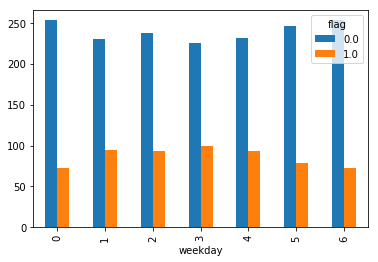

In [2]:
%matplotlib inline
pandas.crosstab(df.weekday,df.flag).plot(kind='bar')

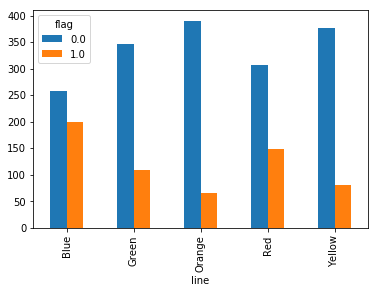

In [3]:
%matplotlib inline
pandas.crosstab(df.line,df.flag).plot(kind='bar')

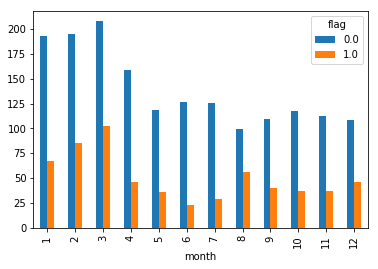

In [4]:
%matplotlib inline
pandas.crosstab(df.month,df.flag).plot(kind='bar')

In [39]:
# setting aside ~80% of observations to train model
# and 20% for testing

import numpy as np
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train, test = split_train_test(df,0.2)
#print(len(train)), "train +", len(test), "test"

train.to_csv('train_delays.csv', sep=',', encoding='utf-8')
test.to_csv('test_delays.csv', sep=',', encoding='utf-8')
print(len(train)), "train +", len(test), "test"

1824


(None, 'train +', 456, 'test')

In [138]:
# model 1: just using line
from sklearn.linear_model import LogisticRegression
import pandas

train = pandas.DataFrame(pandas.read_csv('train_delays.csv',index_col=[0]))
#print(train.dtypes)

# recoding lines to dummies
#line_names = {'Blue','Red','Green','Yellow','Orange'}

train_2 = pandas.get_dummies(data=train, columns=['line'])
#X_line = X_line['line_Blue','line_Green','line_Orange','line_Red','line_Yellow']
print(train_2.head)
print(train_2.dtypes)


# merge all indicators
#X_indicator = 

y = train_2['flag']
X = train_2[['line_Blue','line_Green','line_Orange','line_Red','line_Yellow']]

log_reg = LogisticRegression()
results = log_reg.fit(X,y)
print(results.intercept_)
print(results.coef_)

# cross validate
from sklearn.model_selection import cross_val_score

scores = cross_val_score(results,X,y,cv=10)
print(scores)

# validation around 0.73


<bound method NDFrame.head of            date2  flag  year  month  day  weekday  line_Blue  line_Green  \
182   2017-02-06   0.0  2017      2    6        0          1           0   
35    2017-01-15   0.0  2017      1   15        6          0           0   
1507  2017-09-17   0.0  2017      9   17        6          1           0   
810   2017-05-20   0.0  2017      5   20        5          0           0   
1061  2017-07-08   0.0  2017      7    8        5          1           0   
2151  2018-01-08   0.0  2018      1    8        0          0           0   
552   2017-04-04   0.0  2017      4    4        1          0           0   
2435  2018-02-28   0.0  2018      2   28        2          1           0   
2187  2018-01-15   1.0  2018      1   15        0          0           0   
1617  2017-10-06   0.0  2017     10    6        4          0           0   
524   2017-03-31   1.0  2017      3   31        4          1           0   
636   2017-04-20   1.0  2017      4   20        3         

In [10]:
# model 2: just using line and weekday
from sklearn.linear_model import LogisticRegression
import pandas

train = pandas.DataFrame(pandas.read_csv('train_delays.csv',index_col=[0]))
#print(train.dtypes)

# recoding lines to dummies
#line_names = {'Blue','Red','Green','Yellow','Orange'}

train_2 = pandas.get_dummies(data=train, columns=['line','weekday','month'])
#X_line = X_line['line_Blue','line_Green','line_Orange','line_Red','line_Yellow']
print(train_2.head)
print(train_2.dtypes)


# merge all indicators

y = train_2['flag']
X = train_2[['line_Blue','line_Green','line_Orange','line_Red','line_Yellow',
            'weekday_0','weekday_1','weekday_2','weekday_3','weekday_4',  
            'weekday_5','weekday_6',
            'month_1','month_2','month_3','month_4','month_5','month_6',          
            'month_7','month_8','month_9','month_10','month_11','month_12']]

<bound method NDFrame.head of            date2  flag  year  day  line_Blue  line_Green  line_Orange  \
182   2017-02-06   0.0  2017    6          1           0            0   
35    2017-01-15   0.0  2017   15          0           0            0   
1507  2017-09-17   0.0  2017   17          1           0            0   
810   2017-05-20   0.0  2017   20          0           0            0   
1061  2017-07-08   0.0  2017    8          1           0            0   
2151  2018-01-08   0.0  2018    8          0           0            1   
552   2017-04-04   0.0  2017    4          0           0            1   
2435  2018-02-28   0.0  2018   28          1           0            0   
2187  2018-01-15   1.0  2018   15          0           0            1   
1617  2017-10-06   0.0  2017    6          0           0            0   
524   2017-03-31   1.0  2017   31          1           0            0   
636   2017-04-20   1.0  2017   20          1           0            0   
1929  2017-12-02   0.

In [36]:
log_reg = LogisticRegression()
results = log_reg.fit(X,y)
print(results.intercept_)
print(results.coef_)

[-0.83020866]
[[ 0.74823368 -0.18653638 -0.96196321  0.24580445 -0.67574719 -0.40565484
   0.00277737 -0.0371775   0.10520862  0.01663322 -0.14501649 -0.36697904
  -0.01212042  0.19928278  0.12332974 -0.27240796 -0.13184112 -0.70307031
  -0.60169813  0.52496769 -0.02838263 -0.04318998  0.00563744  0.10928424]]


In [37]:
#predict train
y_pred = log_reg.predict(X)
print(log_reg.score(X,y))

# cross validate
from sklearn.model_selection import cross_val_score

scores = cross_val_score(results,X,y,cv=10)
print(scores)

# validation around 0.73-0.74

0.743421052631579
[0.72677596 0.72677596 0.72131148 0.74863388 0.75956284 0.73224044
 0.73076923 0.72527473 0.75138122 0.74585635]


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[1298   48]
 [ 420   58]]


In [35]:
#gridsearch
from sklearn import metrics,preprocessing,cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(log_reg, hyperparameters, cv=10, verbose=0)
best_model = clf.fit(X, y)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Predict target vector
best_model.predict(X)

Best Penalty: l1
Best C: 1.0


array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
#prepping testing dataset
# model 2: just using line and weekday
from sklearn.linear_model import LogisticRegression
import pandas

test = pandas.DataFrame(pandas.read_csv('test_delays.csv',index_col=[0]))
#print(train.dtypes)

# recoding lines to dummies
#line_names = {'Blue','Red','Green','Yellow','Orange'}

test_2 = pandas.get_dummies(data=test, columns=['line','weekday','month'])
#X_line = X_line['line_Blue','line_Green','line_Orange','line_Red','line_Yellow']
print(test_2.head)
print(test_2.dtypes)


# merge all indicators
#X_indicator = 

y_test = test_2['flag']
X_test = test_2[['line_Blue','line_Green','line_Orange','line_Red','line_Yellow',
            'weekday_0','weekday_1','weekday_2','weekday_3','weekday_4',  
             'weekday_5','weekday_6',
            'month_1','month_2','month_3','month_4','month_5','month_6',          
            'month_7','month_8','month_9','month_10','month_11','month_12']]

<bound method NDFrame.head of            date2  flag  year  day  line_Blue  line_Green  line_Orange  \
1618  2017-10-06   0.0  2017    6          0           0            1   
2450  2018-03-03   1.0  2018    3          1           0            0   
271   2017-02-19   0.0  2017   19          0           0            0   
1915  2017-11-30   0.0  2017   30          0           1            0   
2312  2018-02-07   0.0  2018    7          0           1            0   
1859  2017-11-19   0.0  2017   19          0           0            0   
818   2017-05-22   0.0  2017   22          1           0            0   
2505  2018-03-12   1.0  2018   12          0           0            0   
722   2017-05-04   1.0  2017    4          0           0            1   
1185  2017-07-28   0.0  2017   28          1           0            0   
2194  2018-01-17   0.0  2018   17          1           0            0   
981   2017-06-22   0.0  2017   22          0           0            1   
2652  2018-04-08   1.

In [24]:
from sklearn.metrics import confusion_matrix
y_pred_test = log_reg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)
#little bit and an issue with false negatives

[[318  12]
 [113  13]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

        0.0       0.74      0.96      0.84       330
        1.0       0.52      0.10      0.17       126

avg / total       0.68      0.73      0.65       456



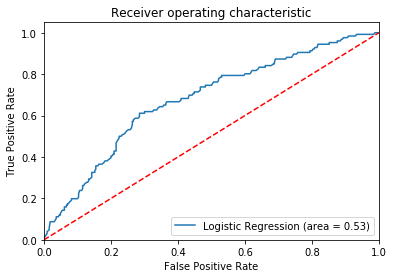

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [46]:
# model:
# Odds of delay = 
# 0.75*Blue + -0.19*Green + -0.96*Orange + 0.25*Red + -0.68*Yellow
#  + -0.41*Mon + 0.003*Tues + -0.04*Wed + 0.11*Thurs + 0.02*Fri
#  + -0.15*Sat + -0.37*Sun

#predict greenline on a thursday in april
#[['line_Blue','line_Green','line_Orange','line_Red','line_Yellow',
#            'weekday_0','weekday_1','weekday_2','weekday_3',
#            'weekday_4','weekday_5','weekday_6',
#            'month_1','month_2','month_3','month_4',
#            'month_5','month_6','month_7','month_8',
#            'month_9','month_10','month_11','month_12']]
#[[ 0.74823368 -0.18653638 -0.96196321  0.24580445 -0.67574719 
#  -0.40565484   0.00277737 -0.0371775   0.10520862  
#   0.01663322 -0.14501649 -0.36697904
#  -0.01212042  0.19928278  0.12332974 -0.27240796 
#  -0.13184112 -0.70307031 -0.60169813  0.52496769 
#  -0.02838263 -0.04318998  0.00563744  0.10928424]]
import numpy as np

print(1/(1+np.exp(-(-0.18653638 + 0.10520862 + -0.27240796 ))))

0.4124768128031701
